In [31]:
pip install kaggle

In [32]:
import kaggle

In [33]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [34]:
api = KaggleApi()
api.authenticate()

In [35]:
import kaggle

# Download the dataset
!kaggle datasets download -d whisperingkahuna/energy-consumption-dataset-by-our-world-in-data

Dataset URL: https://www.kaggle.com/datasets/whisperingkahuna/energy-consumption-dataset-by-our-world-in-data
License(s): other
energy-consumption-dataset-by-our-world-in-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [36]:
import zipfile

# Unzip the file
with zipfile.ZipFile('energy-consumption-dataset-by-our-world-in-data.zip', 'r') as zip_ref:
    zip_ref.extractall('energy_consumption_data')

In [37]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('energy_consumption_data/owid-energy-data.csv')

# Take a look at the first few rows
print(df.head())

         country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
0      

In [38]:
df = pd.read_csv('energy_consumption_data/owid-energy-data.csv')

In [39]:
# Check the shape of the dataset (rows, columns)
print(df.shape)

# See the columns in the dataset
print(df.columns)

# Get a quick summary of the dataset
print(df.info())

# See basic statistics
print(df.describe())

(21812, 130)
Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=130)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21812 entries, 0 to 21811
Columns: 130 entries, country to wind_share_energy
dtypes: float64(127), int64(1), object(2)
memory usage: 21.6+ MB
None
               year    population           gdp  biofuel_cons_change_pct  \
count  21812.000000  1.844700e+04  1.177500e+04              1806.000000   
mean    1974.195718  1.054051e+08  4.260596e+11                45.489759   
std       35.342860  4.665375e+08  3.508591e+12          

In [40]:
# Check for missing values
print(df.isnull().sum())

country                       0
year                          0
iso_code                   5000
population                 3365
gdp                       10037
                          ...  
wind_elec_per_capita      14534
wind_electricity          13578
wind_energy_per_capita    17659
wind_share_elec           14615
wind_share_energy         17619
Length: 130, dtype: int64


In [41]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [42]:
relevant_columns = df[['country', 'year', 'energy_per_capita', 'gdp']]

In [43]:
df = df[df['population'] > 0]

In [44]:
# Check if 'gdp' and 'population' columns exist in your dataset
print(df.columns)

# Calculate GDP per capita
df['gdp_per_capita'] = df['gdp'] / df['population']

# Display the first few rows to confirm the new column
print(df[['country', 'year', 'gdp', 'population', 'gdp_per_capita']].head())

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=130)
        country  year  gdp  population  gdp_per_capita
24  Afghanistan  1900  NaN   4707744.0             NaN
25  Afghanistan  1901  NaN   4751177.0             NaN
26  Afghanistan  1902  NaN   4802500.0             NaN
27  Afghanistan  1903  NaN   4861833.0             NaN
28  Afghanistan  1904  NaN   4921891.0             NaN


In [45]:
# Step 1: Calculate without filling missing values
df['energy_growth'] = df.groupby('country')['energy_per_capita'].pct_change(fill_method=None) * 100
df['gdp_growth'] = df.groupby('country')['gdp_per_capita'].pct_change(fill_method=None) * 100

# Step 2: Drop NaN rows for more precise data
df = df.dropna(subset=['energy_growth', 'gdp_growth'])

In [46]:
df = df.dropna(subset=['gdp_per_capita'])

In [47]:
# Define the income level thresholds and labels
bins = [0, 1045, 4095, 12695, float('inf')]  # Thresholds for income levels
labels = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']

# Categorize countries by GDP per capita
df['income_level'] = pd.cut(df['gdp_per_capita'], bins=bins, labels=labels, right=True)

# Check the resulting dataset
print(df[['country', 'gdp_per_capita', 'income_level']].head())

         country  gdp_per_capita         income_level
105  Afghanistan     1402.516257  Lower middle income
106  Afghanistan     1584.055361  Lower middle income
107  Afghanistan     1683.708221  Lower middle income
108  Afghanistan     1666.602000  Lower middle income
109  Afghanistan     1627.484965  Lower middle income


In [48]:
df.to_csv('cleaned_energy_gdp.csv', index=False)

In [49]:
# Group by income level, selecting only numeric columns, and calculate the mean
grouped_means = df.select_dtypes(include='number').groupby(df['income_level'], observed=False).mean()

# Display the grouped means
print(grouped_means)

                            year    population           gdp  \
income_level                                                   
Low income           1997.922879  2.232421e+07  1.861310e+10   
Lower middle income  1996.519455  5.317509e+07  1.228975e+11   
Upper middle income  1996.434406  4.531501e+07  3.420946e+11   
High income          2000.565027  5.019417e+07  1.129450e+12   

                     biofuel_cons_change_pct  biofuel_cons_change_twh  \
income_level                                                            
Low income                               NaN                      NaN   
Lower middle income                 7.696444                 0.030929   
Upper middle income                81.778176                 0.595822   
High income                        62.923767                 0.975183   

                     biofuel_cons_per_capita  biofuel_consumption  \
income_level                                                        
Low income                            

In [50]:
# Explicitly include specific numeric columns
columns_to_include = ['energy_per_capita', 'gdp_per_capita']
grouped_means = df[columns_to_include].groupby(df['income_level'], observed=False).mean()

print(grouped_means)

                     energy_per_capita  gdp_per_capita
income_level                                          
Low income                  602.030887      828.342203
Lower middle income        2995.168744     2211.999744
Upper middle income       16755.958500     7909.068544
High income               54088.521103    27879.029796


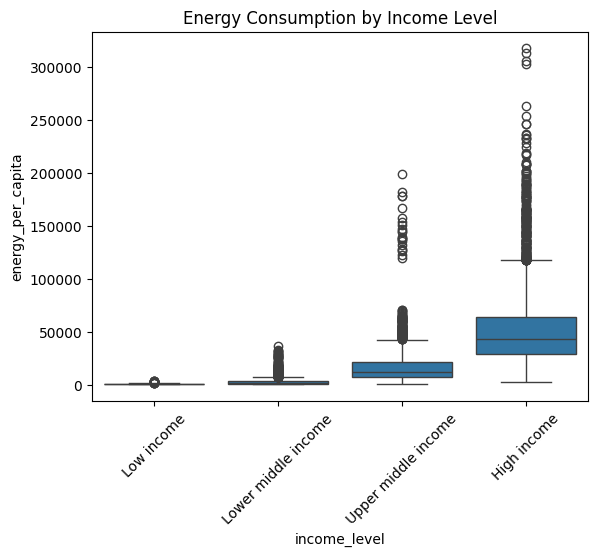

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
sns.boxplot(data=df, x='income_level', y='energy_per_capita')
plt.title('Energy Consumption by Income Level')
plt.xticks(rotation=45)
plt.show()

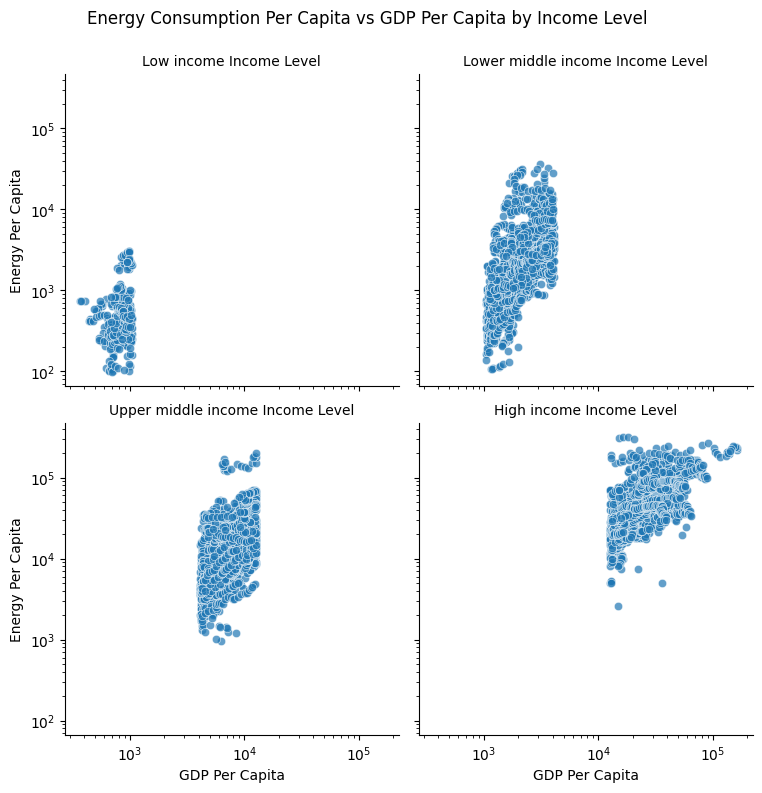

In [52]:
g = sns.FacetGrid(df, col='income_level', height=4, col_wrap=2)
g.map(sns.scatterplot, 'gdp_per_capita', 'energy_per_capita', alpha=0.7)
g.set_axis_labels('GDP Per Capita', 'Energy Per Capita')
g.set_titles('{col_name} Income Level')
g.set(xscale='log', yscale='log')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Energy Consumption Per Capita vs GDP Per Capita by Income Level')
plt.show()

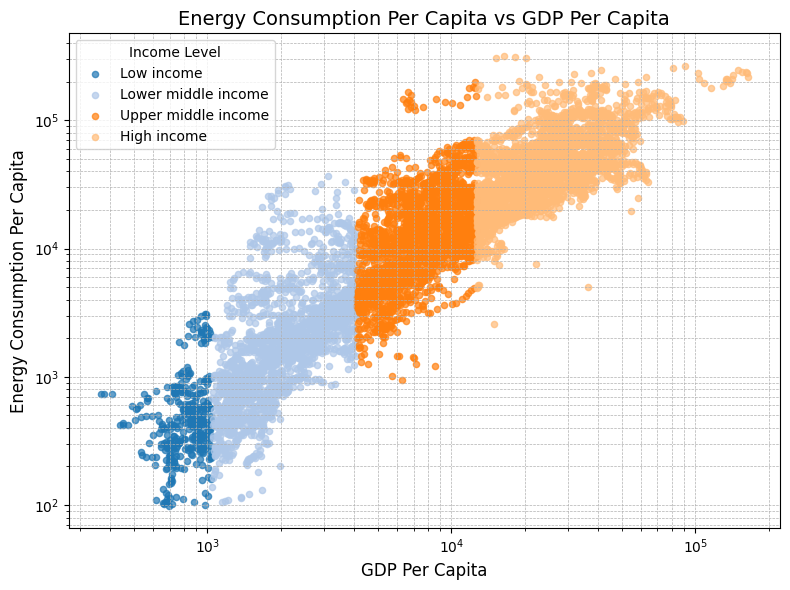

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define custom color palette with two shades of orange and blue
custom_palette = {
    "Low income": "#1f77b4",   # Light blue
    "Lower middle income": "#aec7e8",  # Lighter blue
    "Upper middle income": "#ff7f0e",  # Light orange
    "High income": "#ffbb78",  # Lighter orange
}

# Plotting the scatterplot with updated colors
plt.figure(figsize=(8, 6))

for income_level, color in custom_palette.items():
    subset = df[df['income_level'] == income_level]
    plt.scatter(
        subset['gdp_per_capita'],
        subset['energy_per_capita'],
        label=income_level,
        alpha=0.7,
        s=20,
        c=color,
    )

# Log-log scaling
plt.xscale("log")
plt.yscale("log")

# Adding title and labels
plt.title("Energy Consumption Per Capita vs GDP Per Capita", fontsize=14)
plt.xlabel("GDP Per Capita", fontsize=12)
plt.ylabel("Energy Consumption Per Capita", fontsize=12)

# Adding legend
plt.legend(title="Income Level")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

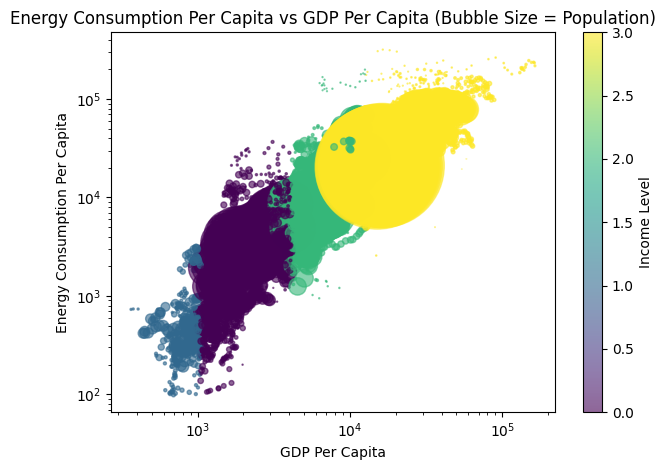

In [54]:
plt.scatter(
    df['gdp_per_capita'],
    df['energy_per_capita'],
    s=df['population'] / 1e6,  # Scale population to reasonable sizes
    c=df['income_level'].factorize()[0],  # Convert income levels to numeric
    cmap='viridis',
    alpha=0.6
)
plt.title('Energy Consumption Per Capita vs GDP Per Capita (Bubble Size = Population)')
plt.xlabel('GDP Per Capita')
plt.ylabel('Energy Consumption Per Capita')
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='Income Level')
plt.tight_layout()
plt.show()